In [50]:
import pandas as pd
import numpy as np
# import scipy as scp
from scipy import stats
import math

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

from IPython.display import Image

In [59]:
data = pd.read_excel('practice_dataframe.xlsx')
df = data[['cat11_nationality', 'cat14_temprature', 'num1_8', 'num2_8', 'num3_8']]
df

,cat11_nationality,cat14_temprature,num1_8,num2_8,num3_8
0,german,Very Hot,247.159357,233.346229,731.516449
1,German,cold,668.812973,96.173995,726.139127
2,german,Very Hot,236.218871,1.799639,742.322785
3,German,Very Hot,989.929212,526.862875,767.297661
4,german,cold,88.636793,64.834346,767.944298
...,...,...,...,...,...
995,French,Very Hot,693.456750,62.973627,756.731417
996,German,cold,172.961735,64.458428,713.537068
997,German,Very Hot,196.283378,33.545698,750.001161
998,German,-,-133.377671,426.799833,729.385345


In [6]:
df.describe()

,num1_8,num2_8
count,1000.000000,954.000000
mean,-155.877022,134.374142
std,2207.055467,327.357183
min,-9999.000000,-887.821952
25%,-18.701641,-58.014155
50%,275.546033,137.603801
75%,579.951628,343.120320
max,1835.649006,1206.981624


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cat11_nationality  980 non-null    object 
 1   cat14_temprature   984 non-null    object 
 2   num1_8             1000 non-null   float64
 3   num2_8             954 non-null    float64
 4   num3_8             973 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


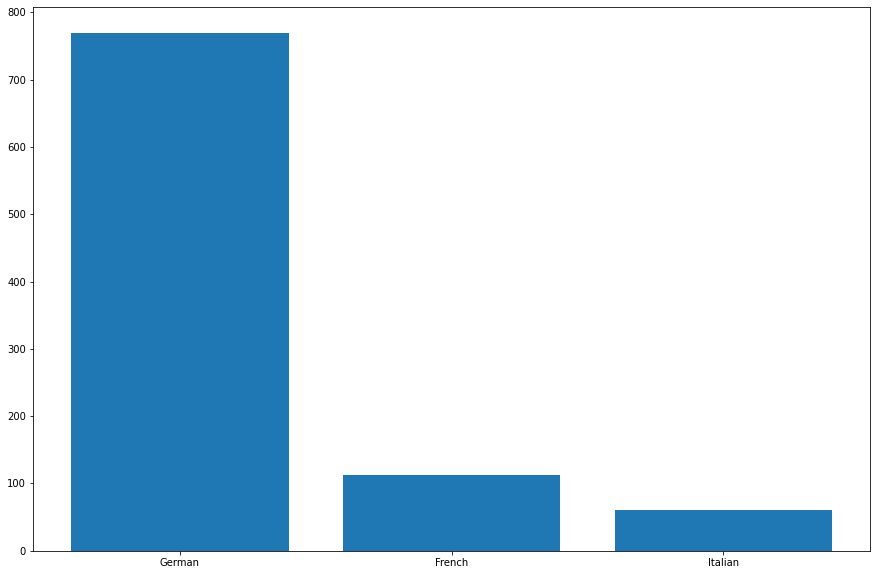

<AxesSubplot:ylabel='cat11_nationality'>

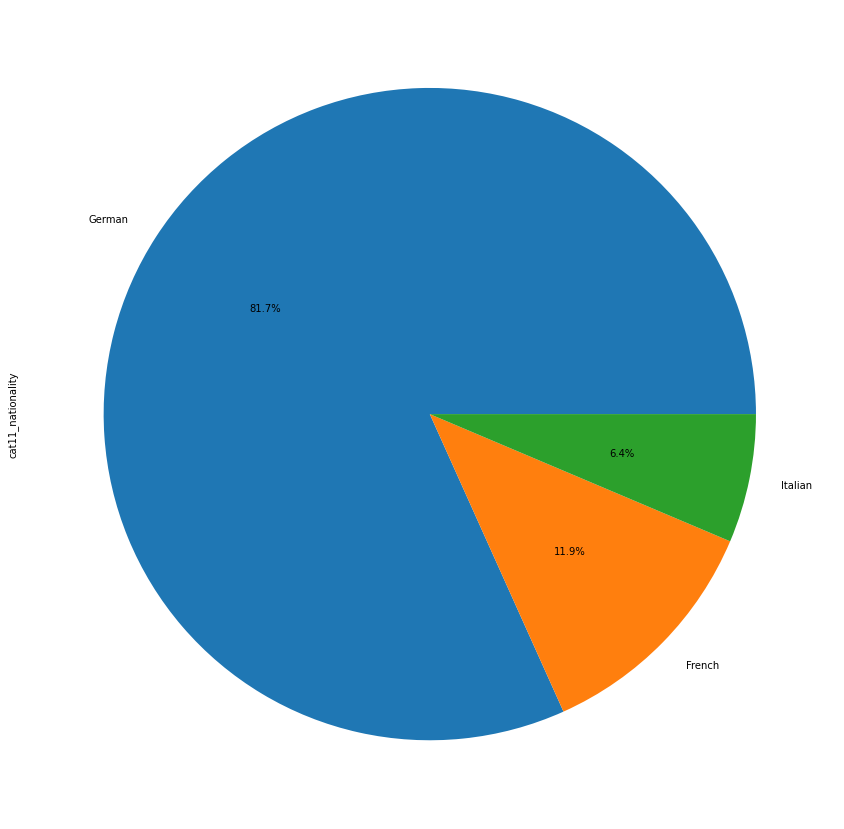

In [52]:
counts = Counter(data['cat11_nationality'].dropna())
plt.figure(figsize=(15, 10))
plt.bar(counts.keys(), counts.values())
plt.show()

data['cat11_nationality'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(15, 15))

In [60]:
data['cat11_nationality'] = data['cat11_nationality'].replace({' ': None})
data['cat11_nationality'] = data['cat11_nationality'].replace({'-': None})
data['cat11_nationality'] = data['cat11_nationality'].replace({'italian': 'Italian'})
data['cat11_nationality'] = data['cat11_nationality'].replace({'german': 'German'})

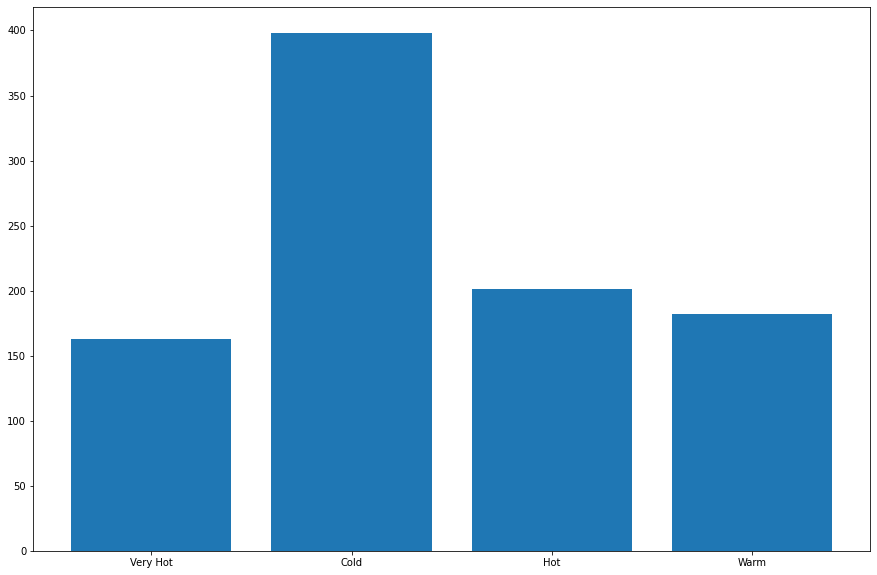

<AxesSubplot:ylabel='cat14_temprature'>

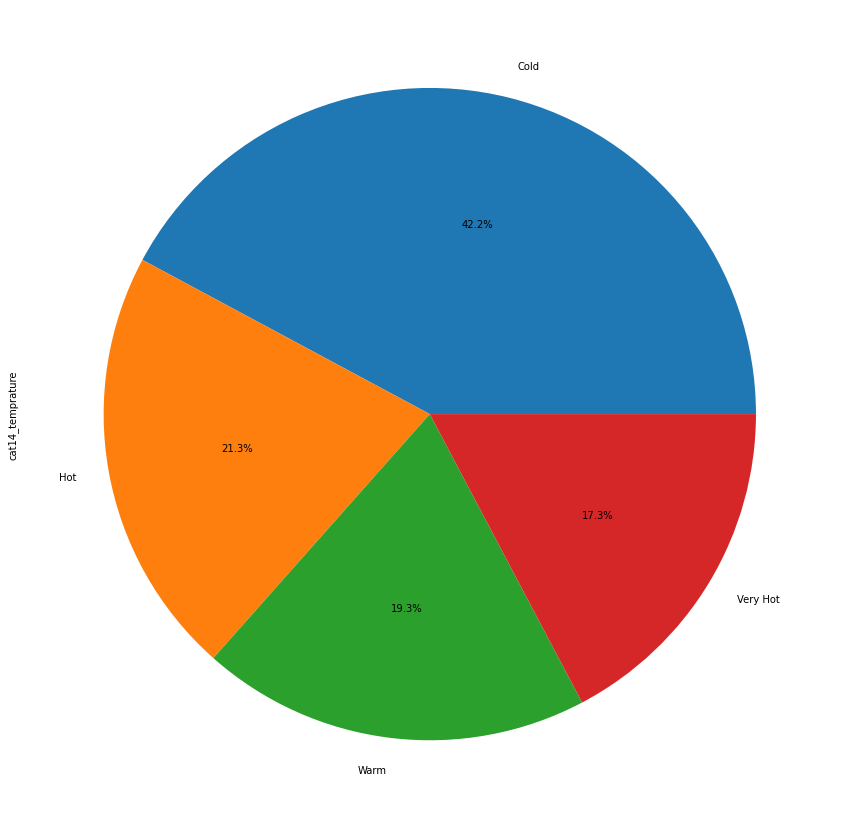

In [5]:
counts = Counter(data['cat14_temprature'].dropna())
plt.figure(figsize=(15, 10))
plt.bar(counts.keys(), counts.values())
plt.show()

data['cat14_temprature'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(15, 15))

In [61]:
data['cat14_temprature'] = data['cat14_temprature'].replace({' ': None})
data['cat14_temprature'] = data['cat14_temprature'].replace({'-': None})
data['cat14_temprature'] = data['cat14_temprature'].replace({'cold': 'Cold'})

<AxesSubplot:xlabel='num1_8', ylabel='Count'>

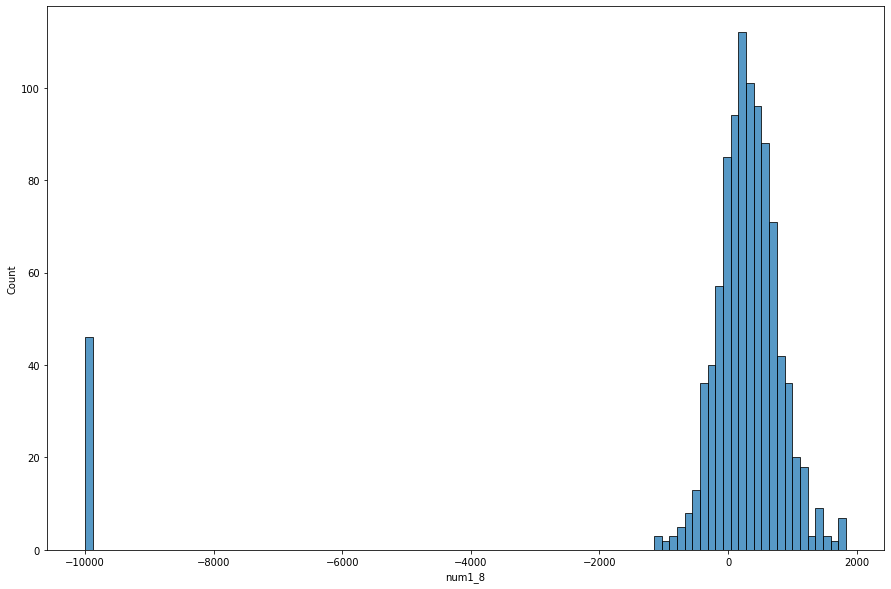

In [12]:
plt.figure(figsize=(15, 10))
sns.histplot(data['num1_8'])

<AxesSubplot:ylabel='num1_8'>

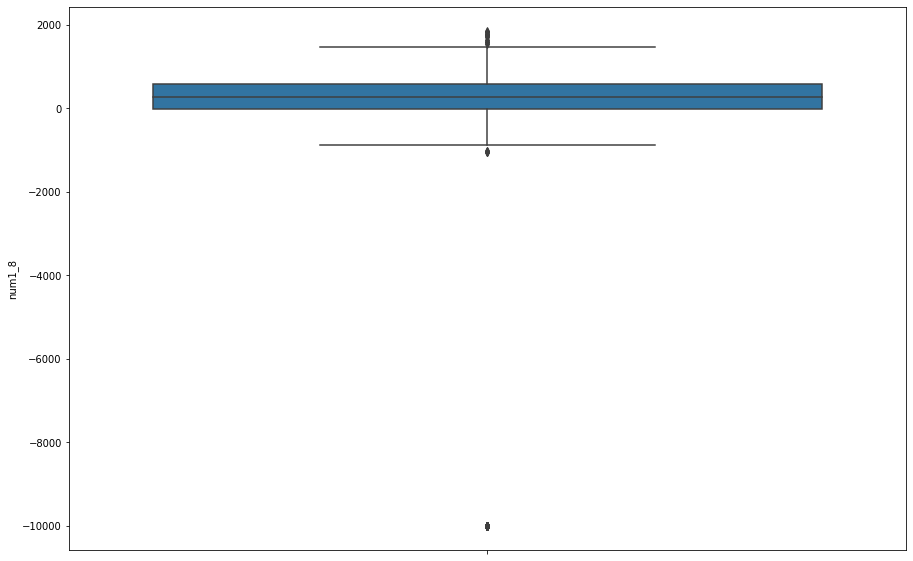

In [47]:
plt.figure(figsize=(15, 10))
sns.boxplot(y=data['num1_8'])

<AxesSubplot:xlabel='num2_8', ylabel='Count'>

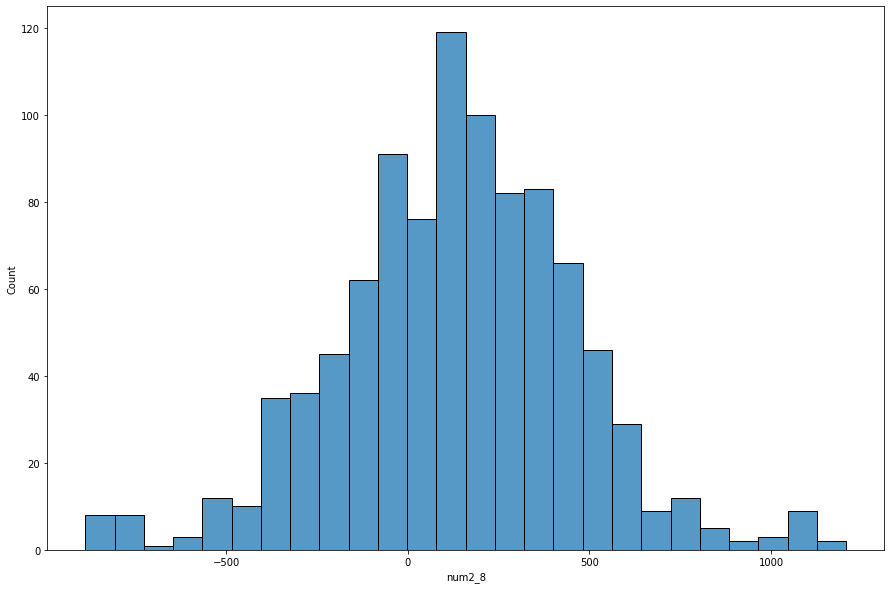

In [48]:
plt.figure(figsize=(15, 10))
sns.histplot(data['num2_8'])

<AxesSubplot:ylabel='num2_8'>

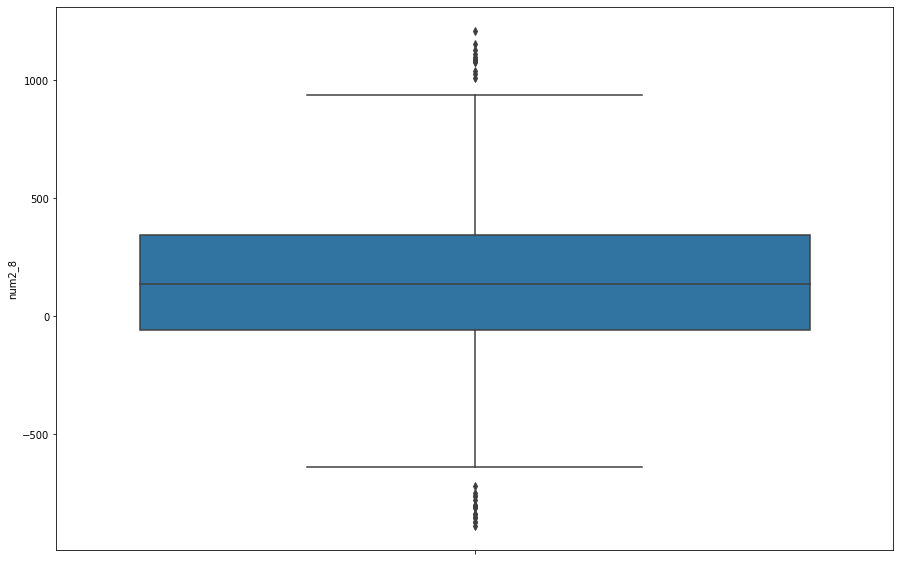

In [49]:
plt.figure(figsize=(15, 10))
sns.boxplot(y=data['num2_8'])

<AxesSubplot:xlabel='num3_8', ylabel='Count'>

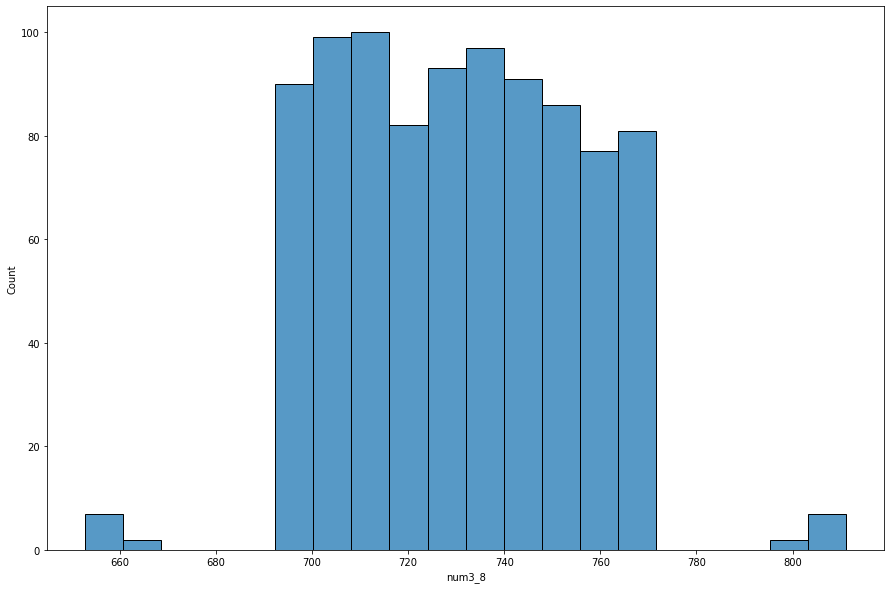

In [62]:
plt.figure(figsize=(15, 10))
data['num3_8'] = data['num3_8'].replace({' ': None})
data['num3_8'] = data['num3_8'].replace({'-': None})
sns.histplot(data['num3_8'])

<AxesSubplot:ylabel='num3_8'>

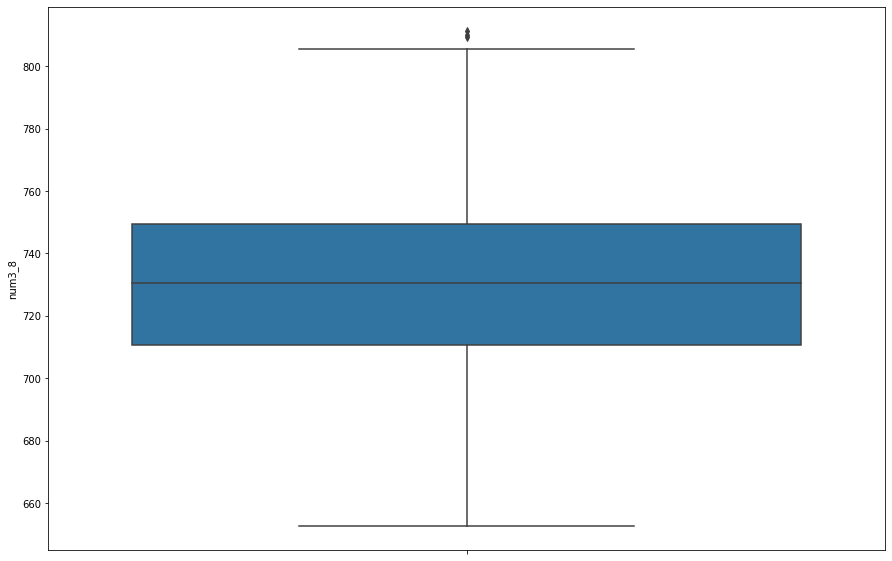

In [62]:
plt.figure(figsize=(15, 10))
sns.boxplot(y=data['num3_8'])

In [64]:
df = data[['cat11_nationality', 'cat14_temprature', 'num1_8', 'num2_8', 'num3_8']]
df.describe()

,num1_8,num2_8,num3_8
count,1000.000000,954.000000,914.000000
mean,-155.877022,134.374142,730.771759
std,2207.055467,327.357183,24.636383
min,-9999.000000,-887.821952,652.836741
25%,-18.701641,-58.014155,710.722143
50%,275.546033,137.603801,730.694978
75%,579.951628,343.120320,749.361485
max,1835.649006,1206.981624,811.118277


<AxesSubplot:>

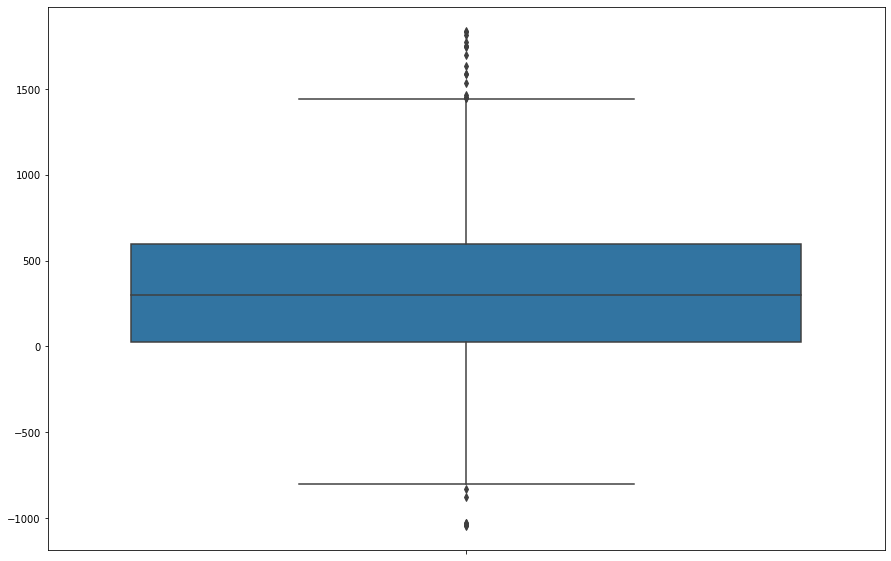

In [79]:
updated, _, _ = stats.sigmaclip(data['num1_8'])
plt.figure(figsize=(15, 10))
sns.boxplot(y=updated)

<AxesSubplot:>

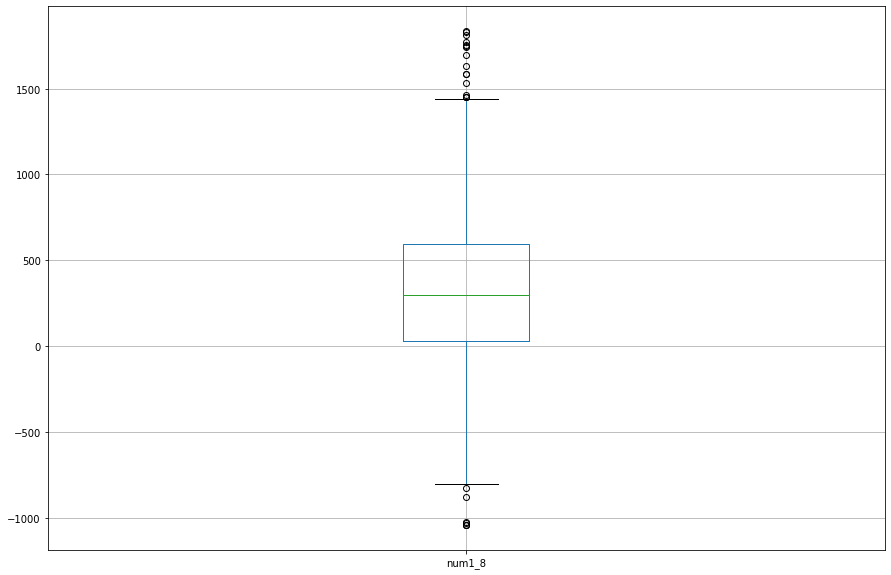

In [104]:
Q1 = np.nanquantile(data['num1_8'], 0.25)
Q3 = np.nanquantile(data['num1_8'], 0.75)
MP = Q3 - Q1
df_IQR = data[(data['num1_8'] > Q1 - 3 * MP) & (data['num1_8'] < Q3 + 3 * MP)]
plt.figure(figsize=(15, 10))
df_IQR.boxplot(column='num1_8')

In [65]:
updated, _, _ = stats.sigmaclip(data['num1_8'])
plt.figure(figsize=(15, 10))

replacer = {'num1_8': {}}
if len(updated) > 0:
    for line in data['num1_8']:
        if line not in updated:
            replacer['num1_8'][line] = np.nan

print(replacer)
if len(replacer['num1_8']) > 0:
    data = data.replace(replacer)
data['num1_8']

{'num1_8': {-9999.0: nan}}


0      247.159357
1      668.812973
2      236.218871
3      989.929212
4       88.636793
          ...    
995    693.456750
996    172.961735
997    196.283378
998   -133.377671
999    -72.979302
Name: num1_8, Length: 1000, dtype: float64

<Figure size 1080x720 with 0 Axes>

In [67]:
updated, _, _ = stats.sigmaclip(data['num2_8'])
plt.figure(figsize=(15, 10))


replacer = {'num2_8': {}}
if len(updated) > 0:
    for line in data['num2_8']:
        if line not in updated:
            replacer['num2_8'][line] = np.nan

        
print(replacer)
if len(replacer['num2_8']) > 0:
    data = data.replace(replacer)
data['num2_8']

{'num2_8': {}}


0      233.346229
1       96.173995
2        1.799639
3      526.862875
4       64.834346
          ...    
995     62.973627
996     64.458428
997     33.545698
998    426.799833
999    464.629839
Name: num2_8, Length: 1000, dtype: float64

<Figure size 1080x720 with 0 Axes>

In [68]:
def not_float(value):
  try:
    float(value)
    return False
  except:
    return True

replacer = {'num3_8': {}}
for line in data['num3_8']:
    if not_float(line):
        replacer['num3_8'][line] = np.nan

if len(replacer['num3_8']) > 0:
    data = data.replace(replacer)

updated, _, _ = stats.sigmaclip(data['num3_8'])
plt.figure(figsize=(15, 10))

replacer = {'num3_8': {}}
if len(updated) > 0:
    for line in data['num3_8']:
        if line not in updated:
            replacer['num3_8'][line] = np.nan

print(replacer)
if len(replacer['num3_8']) > 0:
    data = data.replace(replacer)

{'num3_8': {}}


<Figure size 1080x720 with 0 Axes>

<AxesSubplot:ylabel='num1_8'>

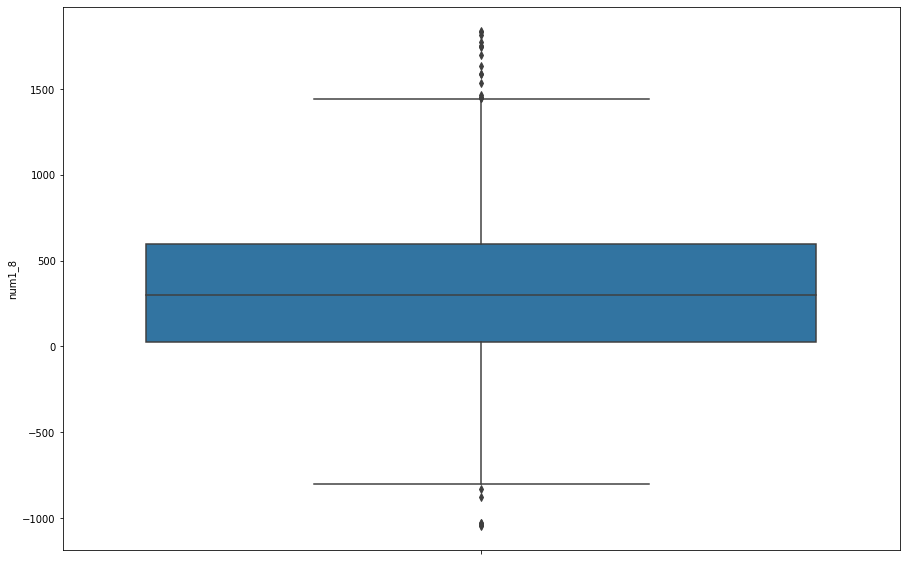

In [156]:
plt.figure(figsize=(15, 10))
sns.boxplot(y=data['num1_8'])

In [264]:
temp_data = data[['cat11_nationality', 'cat14_temprature', 'num1_8', 'num2_8', 'num3_8']].copy()
temp_data.describe()

,num1_8,num2_8,num3_8
count,954.000000,954.000000,914.000000
mean,318.738971,134.374142,730.771759
std,451.788050,327.357183,24.636383
min,-1044.057109,-887.821952,652.836741
25%,26.837357,-58.014155,710.722143
50%,299.623464,137.603801,730.694978
75%,595.493906,343.120320,749.361485
max,1835.649006,1206.981624,811.118277


In [265]:
df = temp_data.copy()
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[['num3_8']])
num38max = df['num3_8'].max()
num38min = df['num3_8'].min()

df['num3_8_scaled'] = scaled_values

enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(df[['cat11_nationality']]).toarray(), 
                      columns=['French', 'German', 'Italian', 'None', 'nan'])

counter = 0
for _ in enc_df['German']:
    if enc_df['None'][counter] + enc_df['nan'][counter] > 0:
        enc_df['German'][counter] = enc_df['French'][counter] = enc_df['Italian'][counter] = np.nan
        enc_df['None'][counter] = enc_df['nan'][counter] = 0
    counter += 1
    
df = df.join(enc_df)

print(df)

    cat11_nationality cat14_temprature      num1_8      num2_8      num3_8  \
0              German         Very Hot  247.159357  233.346229  731.516449   
1              German             Cold  668.812973   96.173995  726.139127   
2              German         Very Hot  236.218871    1.799639  742.322785   
3              German         Very Hot  989.929212  526.862875  767.297661   
4              German             Cold   88.636793   64.834346  767.944298   
..                ...              ...         ...         ...         ...   
995            French         Very Hot  693.456750   62.973627  756.731417   
996            German             Cold  172.961735   64.458428  713.537068   
997            German         Very Hot  196.283378   33.545698  750.001161   
998            German             None -133.377671  426.799833  729.385345   
999            German             Cold  -72.979302  464.629839  732.606965   

     num3_8_scaled  French  German  Italian  None  nan  
0     

In [271]:
df_copy = df.copy()          
knn_imputer = KNNImputer(weights='uniform')
# knn_imputer = KNNImputer(weights='distance')
inputed_df = knn_imputer.fit_transform(df_copy[['num3_8', 'French', 'German', 'Italian']])
df['num3_8'] = inputed_df[:, 0]
df['French'] = inputed_df[:, 1]
df['German'] = inputed_df[:, 2]
df['Italian'] = inputed_df[:, 3]

new_num38 = []
for line in df['num3_8_scaled']:
    new_num38.append(num38min + line * (num38max - num38min))

num3_8_fromscaled = pd.DataFrame(new_num38, columns=['fromscaled'])
print(num3_8_fromscaled['fromscaled'].mean(), len(num3_8_fromscaled['fromscaled']))
print(df['num3_8'].mean(), len(df['num3_8']))

df['cat11_nationality'] = enc.inverse_transform(df.iloc[:, -5:])
print(df)
temp_data = df.copy()

730.7717593574157 1000
730.7717593574156 1000
    cat11_nationality cat14_temprature      num1_8      num2_8      num3_8  \
0              German         Very Hot  247.159357  233.346229  731.516449   
1              German             Cold  668.812973   96.173995  726.139127   
2              German         Very Hot  236.218871    1.799639  742.322785   
3              German         Very Hot  989.929212  526.862875  767.297661   
4              German             Cold   88.636793   64.834346  767.944298   
..                ...              ...         ...         ...         ...   
995            French         Very Hot  693.456750   62.973627  756.731417   
996            German             Cold  172.961735   64.458428  713.537068   
997            German         Very Hot  196.283378   33.545698  750.001161   
998            German             None -133.377671  426.799833  729.385345   
999            German             Cold  -72.979302  464.629839  732.606965   

     num3_8_scale

In [273]:
mode = temp_data['cat14_temprature'].mode()[0]
temp_data['cat14_temprature'].fillna(mode, inplace=True)
temp_data['cat14_temprature']

0      Very Hot
1          Cold
2      Very Hot
3      Very Hot
4          Cold
         ...   
995    Very Hot
996        Cold
997    Very Hot
998        Cold
999        Cold
Name: cat14_temprature, Length: 1000, dtype: object

In [274]:
average = temp_data['num1_8'].mean()
temp_data['num1_8'].fillna(average, inplace=True)
temp_data['num1_8']

0      247.159357
1      668.812973
2      236.218871
3      989.929212
4       88.636793
          ...    
995    693.456750
996    172.961735
997    196.283378
998   -133.377671
999    -72.979302
Name: num1_8, Length: 1000, dtype: float64

In [275]:
median = temp_data['num2_8'].median()
temp_data['num2_8'].fillna(median, inplace=True)
temp_data['num2_8']

0      233.346229
1       96.173995
2        1.799639
3      526.862875
4       64.834346
          ...    
995     62.973627
996     64.458428
997     33.545698
998    426.799833
999    464.629839
Name: num2_8, Length: 1000, dtype: float64

In [276]:
def not_nan_counter(frame):
    lines = len(frame)
    for i in frame:
        if type(i) == str:
            continue
        if type(i) == float and math.isnan(i):
            lines -= 1
    return lines



print(not_nan_counter(data['cat11_nationality']))
print(not_nan_counter(data['cat14_temprature']))
print(not_nan_counter(data['num1_8']))
print(not_nan_counter(data['num2_8']))
print(not_nan_counter(data['num3_8']))

print()

print(not_nan_counter(temp_data['cat11_nationality']))
print(not_nan_counter(temp_data['cat14_temprature']))
print(not_nan_counter(temp_data['num1_8']))
print(not_nan_counter(temp_data['num2_8']))
print(not_nan_counter(temp_data['num3_8']))

980
984
954
954
914

1000
1000
1000
1000
1000


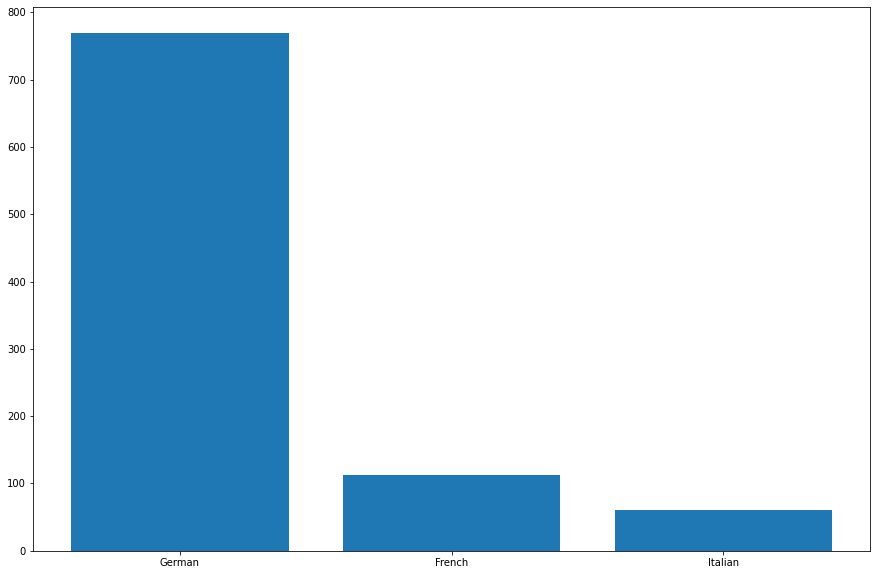

<AxesSubplot:ylabel='cat11_nationality'>

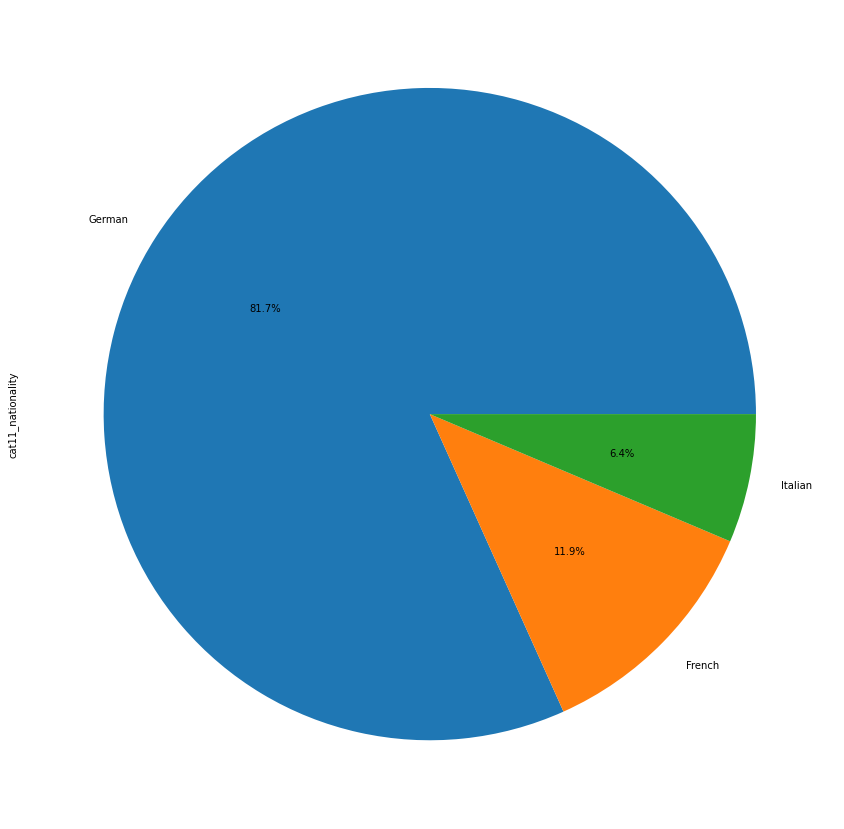

In [277]:
counts = Counter(data['cat11_nationality'].dropna())
plt.figure(figsize=(15, 10))
plt.bar(counts.keys(), counts.values())
plt.show()

data['cat11_nationality'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(15, 15))

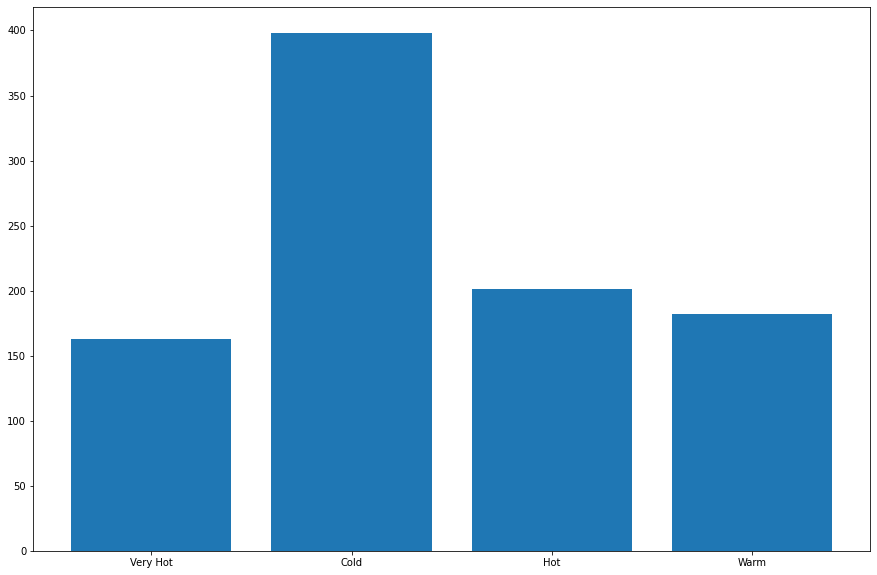

<AxesSubplot:ylabel='cat14_temprature'>

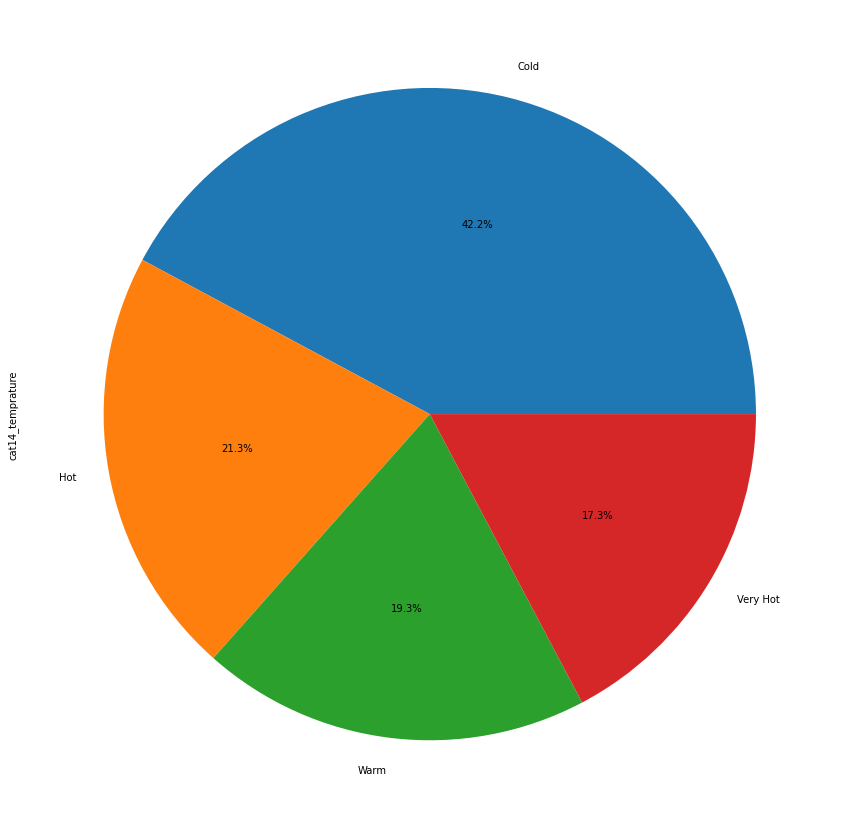

In [278]:
counts = Counter(data['cat14_temprature'].dropna())
plt.figure(figsize=(15, 10))
plt.bar(counts.keys(), counts.values())
plt.show()

data['cat14_temprature'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(15, 15))

<AxesSubplot:xlabel='num1_8', ylabel='Count'>

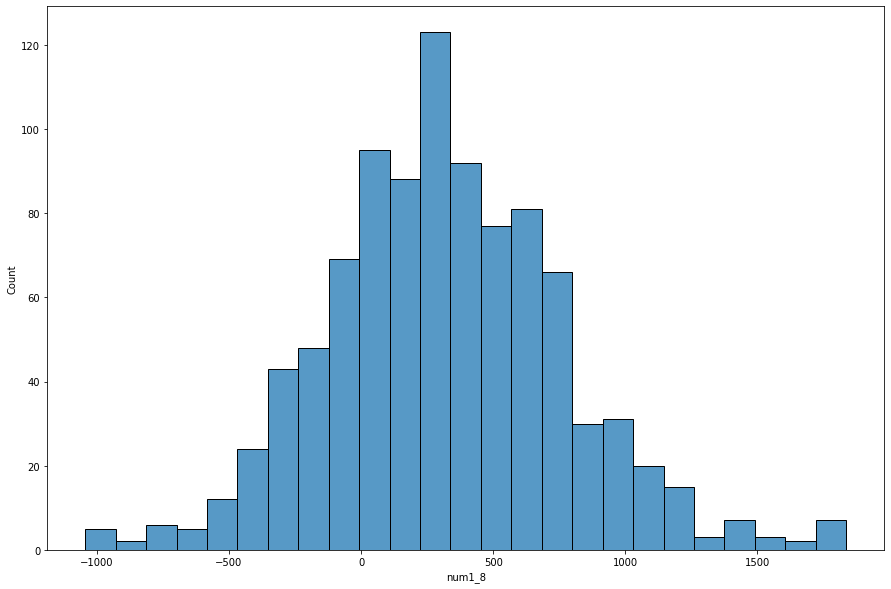

In [279]:
plt.figure(figsize=(15, 10))
sns.histplot(data['num1_8'])

<AxesSubplot:ylabel='num1_8'>

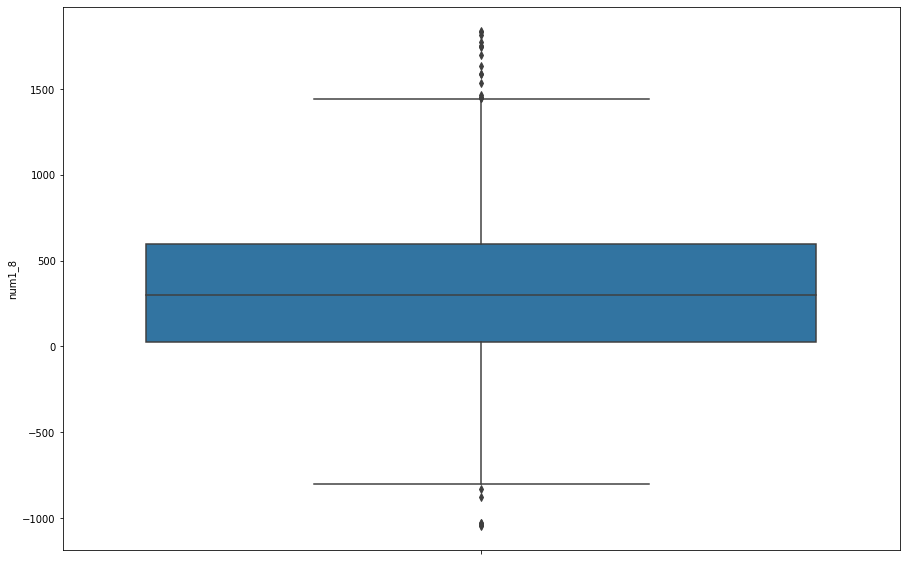

In [280]:
plt.figure(figsize=(15, 10))
sns.boxplot(y=data['num1_8'])

<AxesSubplot:xlabel='num2_8', ylabel='Count'>

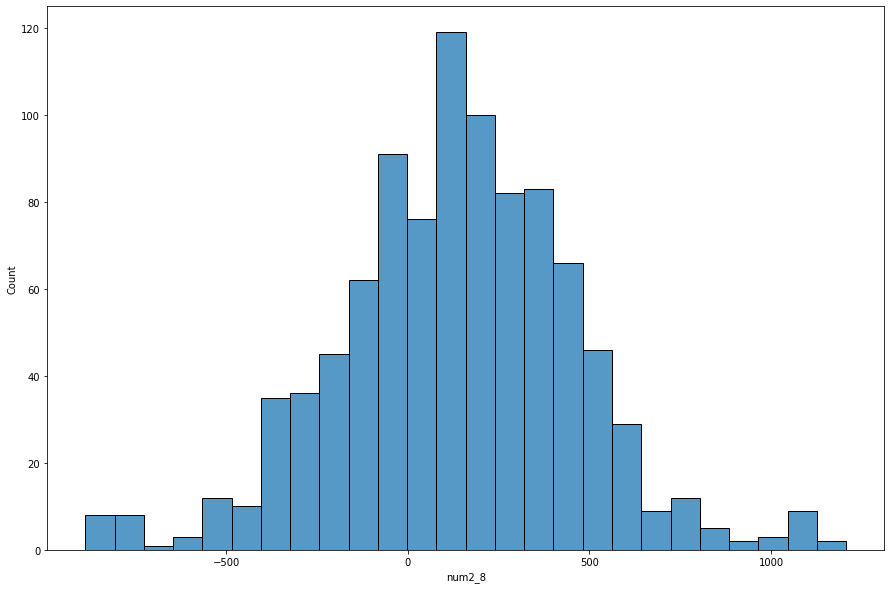

In [281]:
plt.figure(figsize=(15, 10))
sns.histplot(data['num2_8'])

<AxesSubplot:ylabel='num2_8'>

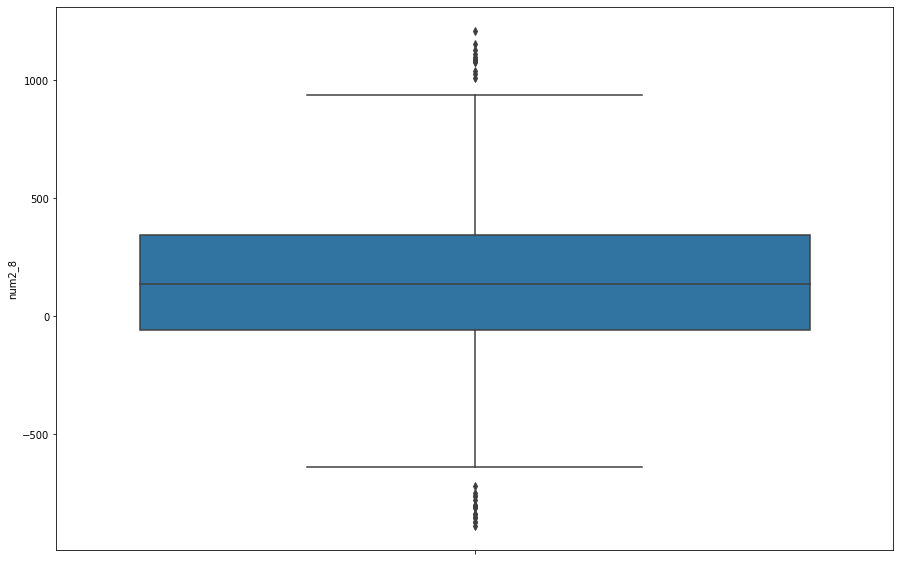

In [282]:
plt.figure(figsize=(15, 10))
sns.boxplot(y=data['num2_8'])

<AxesSubplot:xlabel='num3_8', ylabel='Count'>

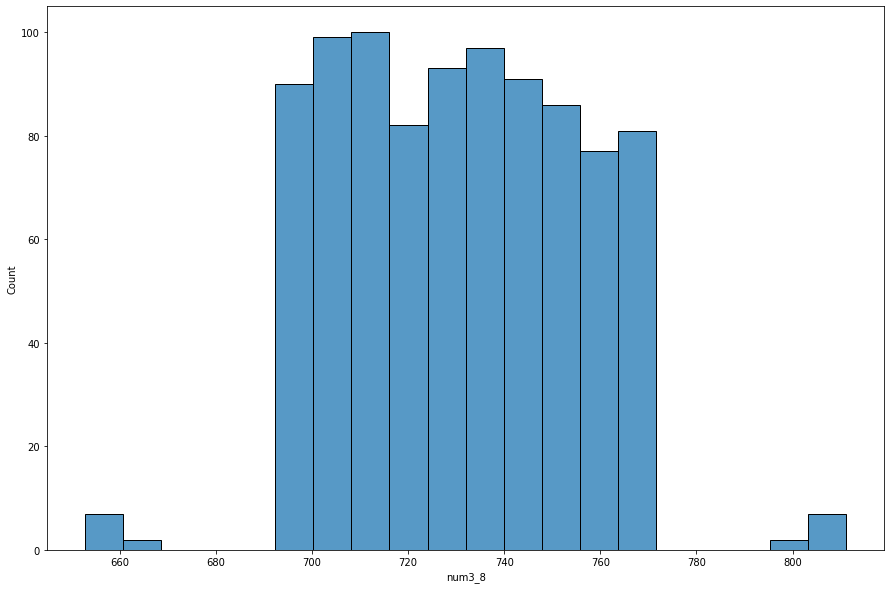

In [283]:
plt.figure(figsize=(15, 10))
sns.histplot(data['num3_8'])

<AxesSubplot:ylabel='num3_8'>

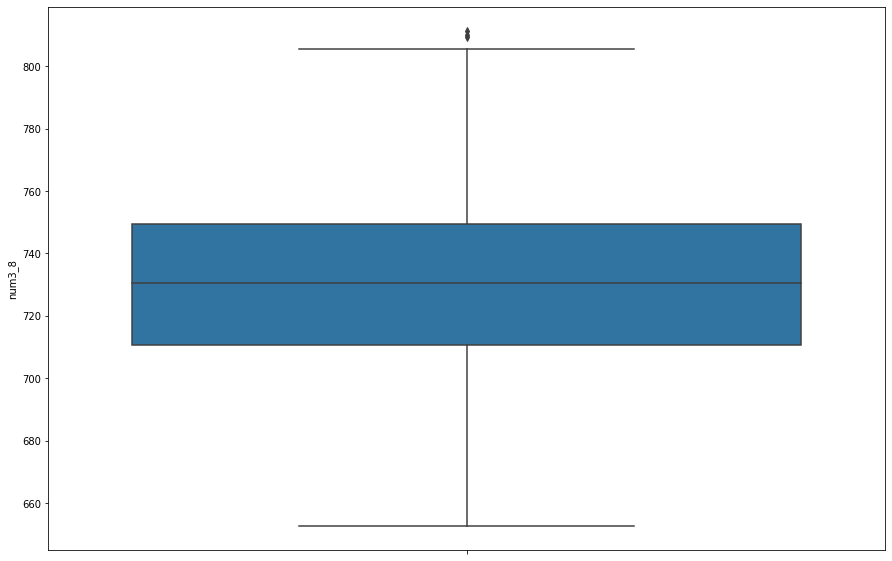

In [284]:
plt.figure(figsize=(15, 10))
sns.boxplot(y=data['num3_8'])

In [303]:
df = temp_data[['cat11_nationality', 'cat14_temprature', 'num1_8', 'num2_8', 'num3_8']].copy()
df.describe()

,num1_8,num2_8,num3_8
count,1000.000000,1000.000000,1000.000000
mean,318.738971,134.522706,730.771759
std,441.263947,319.732332,23.552097
min,-1044.057109,-887.821952,652.836741
25%,37.376707,-52.219709,712.300541
50%,317.846494,137.603801,730.771759
75%,579.951628,332.450932,748.246036
max,1835.649006,1206.981624,811.118277


In [304]:
scaler = StandardScaler()
transformer = MinMaxScaler()
a = scaler.fit_transform(df[['num1_8']])
df['num1_8_standart'] = a
print(a)
print('----------')
a = transformer.fit_transform(df[['num1_8']])
df['num1_8_normalize'] = a
print(a)
df

[[-1.62296129e-01]
 [ 7.93740737e-01]
 [-1.87102053e-01]
 [ 1.52182405e+00]
 [-5.21722468e-01]
 [-9.72218206e-01]
 [-5.47737786e-01]
 [ 1.52170325e+00]
 [-3.29960832e-01]
 [ 1.28883999e-16]
 [ 2.63232019e-01]
 [ 3.04905609e-01]
 [ 4.66199651e-01]
 [-5.28446428e-01]
 [ 7.00038855e-01]
 [-1.13981200e+00]
 [-1.74080670e-02]
 [-1.05666740e+00]
 [-2.71804023e+00]
 [ 5.43162867e-01]
 [ 5.85866739e-02]
 [-8.26180754e-01]
 [ 5.84219005e-01]
 [-2.61541836e-01]
 [ 3.86177702e-01]
 [ 6.04337152e-01]
 [-7.69075448e-01]
 [ 7.53391917e-01]
 [ 3.27208721e-01]
 [ 1.44783401e+00]
 [ 4.90606633e-01]
 [ 1.35859919e-01]
 [ 1.37675387e+00]
 [-2.50644122e-01]
 [-2.04564553e-01]
 [ 5.60021775e-01]
 [ 6.26978380e-02]
 [ 1.74291292e+00]
 [ 1.32713636e+00]
 [ 7.00333873e-01]
 [-5.30153587e-01]
 [ 4.11183575e-01]
 [ 9.02817850e-01]
 [-2.18246021e+00]
 [ 2.43023220e-01]
 [ 1.94488600e-01]
 [ 1.85471909e+00]
 [-2.01580328e-01]
 [-2.11422110e-01]
 [ 1.28883999e-16]
 [-9.77329589e-01]
 [ 5.58611161e-01]
 [-1.5560666

,cat11_nationality,cat14_temprature,num1_8,num2_8,num3_8,num1_8_standart,num1_8_normalize
0,German,Very Hot,247.159357,233.346229,731.516449,-0.162296,0.448385
1,German,Cold,668.812973,96.173995,726.139127,0.793741,0.594807
2,German,Very Hot,236.218871,1.799639,742.322785,-0.187102,0.444586
3,German,Very Hot,989.929212,526.862875,767.297661,1.521824,0.706317
4,German,Cold,88.636793,64.834346,767.944298,-0.521722,0.393337
...,...,...,...,...,...,...,...
995,French,Very Hot,693.456750,62.973627,756.731417,0.849617,0.603365
996,German,Cold,172.961735,64.458428,713.537068,-0.330528,0.422619
997,German,Very Hot,196.283378,33.545698,750.001161,-0.277650,0.430718
998,German,Cold,-133.377671,426.799833,729.385345,-1.025107,0.316240


In [305]:
scaler = StandardScaler()
transformer = MinMaxScaler()
a = scaler.fit_transform(df[['num2_8']])
df['num2_8_standart'] = a
print(a)
print('----------')
a = transformer.fit_transform(df[['num2_8']])
df['num2_8_normalize'] = a
print(a)
df

[[ 3.09236702e-01]
 [-1.20000063e-01]
 [-4.15314517e-01]
 [ 1.22770345e+00]
 [-2.18067503e-01]
 [-3.23079222e-01]
 [ 1.24746267e-01]
 [ 3.27578380e-02]
 [-1.02467533e+00]
 [ 8.38079061e-01]
 [-9.84883499e-01]
 [-1.64923804e-01]
 [-1.20010851e+00]
 [ 3.66236853e-01]
 [ 9.64130382e-03]
 [ 3.34815493e-01]
 [ 2.97089944e+00]
 [-1.99359300e+00]
 [-9.54272702e-01]
 [ 3.69419996e-01]
 [-5.55750435e-01]
 [-1.21189541e+00]
 [-5.08892679e-01]
 [-2.14632876e-01]
 [-8.31968935e-01]
 [-1.44213782e+00]
 [ 7.61415024e-01]
 [ 2.38922440e-01]
 [-5.12092435e-01]
 [ 1.87429548e-01]
 [ 1.52768962e-01]
 [-1.16479718e+00]
 [ 6.45463501e-01]
 [-1.22543145e+00]
 [ 3.52997219e-01]
 [-1.49441341e+00]
 [ 7.92245051e-01]
 [ 5.03055930e-02]
 [-9.61402484e-01]
 [ 1.97988582e-01]
 [ 3.35591820e+00]
 [ 1.96779881e-01]
 [ 3.90489025e-01]
 [ 8.23801301e-01]
 [ 9.64130382e-03]
 [-2.42576342e-01]
 [-1.26971381e+00]
 [-3.78318872e-01]
 [ 1.96062835e-01]
 [ 2.08307073e-01]
 [ 2.33399991e-01]
 [-1.88781683e+00]
 [ 7.6271824

,cat11_nationality,cat14_temprature,num1_8,num2_8,num3_8,num1_8_standart,num1_8_normalize,num2_8_standart,num2_8_normalize
0,German,Very Hot,247.159357,233.346229,731.516449,-0.162296,0.448385,0.309237,0.535214
1,German,Cold,668.812973,96.173995,726.139127,0.793741,0.594807,-0.120000,0.469732
2,German,Very Hot,236.218871,1.799639,742.322785,-0.187102,0.444586,-0.415315,0.424680
3,German,Very Hot,989.929212,526.862875,767.297661,1.521824,0.706317,1.227703,0.675331
4,German,Cold,88.636793,64.834346,767.944298,-0.521722,0.393337,-0.218068,0.454771
...,...,...,...,...,...,...,...,...,...
995,French,Very Hot,693.456750,62.973627,756.731417,0.849617,0.603365,-0.223890,0.453883
996,German,Cold,172.961735,64.458428,713.537068,-0.330528,0.422619,-0.219244,0.454592
997,German,Very Hot,196.283378,33.545698,750.001161,-0.277650,0.430718,-0.315975,0.439835
998,German,Cold,-133.377671,426.799833,729.385345,-1.025107,0.316240,0.914588,0.627563


In [306]:
scaler = StandardScaler()
transformer = MinMaxScaler()
a = scaler.fit_transform(df[['num3_8']])
df['num3_8_standart'] = a
print(a)
print('----------')
a = transformer.fit_transform(df[['num3_8']])
df['num3_8_normalize'] = a
print(a)
df

[[ 3.16346562e-02]
 [-1.96795653e-01]
 [ 4.90691150e-01]
 [ 1.55163163e+00]
 [ 1.57910094e+00]
 [ 1.23573721e+00]
 [ 1.12628449e+00]
 [-4.44257082e-01]
 [-9.36342362e-01]
 [-5.71314957e-01]
 [-6.95013556e-01]
 [ 4.82945205e-15]
 [ 1.20470408e+00]
 [ 1.26887522e+00]
 [ 4.82945205e-15]
 [ 4.31456334e-01]
 [-6.71001955e-01]
 [-3.74411311e-01]
 [ 2.80698500e-01]
 [ 6.78477190e-01]
 [ 6.03001105e-03]
 [ 9.93004305e-01]
 [-9.81932738e-03]
 [-1.27239101e-01]
 [ 4.82945205e-15]
 [-3.19544317e+00]
 [-7.48750052e-01]
 [ 6.16977242e-01]
 [ 4.82945205e-15]
 [ 1.46086951e-01]
 [-1.13799102e+00]
 [-6.48511255e-01]
 [ 1.05911751e+00]
 [-9.09276749e-01]
 [-3.42849228e-02]
 [ 7.41571031e-01]
 [-1.38713724e+00]
 [ 1.05647271e+00]
 [-7.51727817e-01]
 [-1.11475263e+00]
 [ 3.97406518e-01]
 [-1.03657919e+00]
 [ 2.90717024e+00]
 [ 1.19905380e+00]
 [ 4.82945205e-15]
 [ 1.45268017e+00]
 [ 1.50456001e+00]
 [-1.52502620e+00]
 [ 1.91947004e-01]
 [-1.59636903e+00]
 [-1.39150602e+00]
 [ 1.30991458e+00]
 [-1.4503475

,cat11_nationality,cat14_temprature,num1_8,num2_8,num3_8,num1_8_standart,num1_8_normalize,num2_8_standart,num2_8_normalize,num3_8_standart,num3_8_normalize
0,German,Very Hot,247.159357,233.346229,731.516449,-0.162296,0.448385,0.309237,0.535214,0.031635,0.497087
1,German,Cold,668.812973,96.173995,726.139127,0.793741,0.594807,-0.120000,0.469732,-0.196796,0.463114
2,German,Very Hot,236.218871,1.799639,742.322785,-0.187102,0.444586,-0.415315,0.424680,0.490691,0.565360
3,German,Very Hot,989.929212,526.862875,767.297661,1.521824,0.706317,1.227703,0.675331,1.551632,0.723148
4,German,Cold,88.636793,64.834346,767.944298,-0.521722,0.393337,-0.218068,0.454771,1.579101,0.727233
...,...,...,...,...,...,...,...,...,...,...,...
995,French,Very Hot,693.456750,62.973627,756.731417,0.849617,0.603365,-0.223890,0.453883,1.102774,0.656392
996,German,Cold,172.961735,64.458428,713.537068,-0.330528,0.422619,-0.219244,0.454592,-0.732135,0.383496
997,German,Very Hot,196.283378,33.545698,750.001161,-0.277650,0.430718,-0.315975,0.439835,0.816871,0.613871
998,German,Cold,-133.377671,426.799833,729.385345,-1.025107,0.316240,0.914588,0.627563,-0.058895,0.483623


In [307]:
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(df[['cat11_nationality']]).toarray(), 
                      columns=['cat11_nationality_french', 'cat11_nationality_german', 'cat11_nationality_italian'])
df = df.join(enc_df)
df

,cat11_nationality,cat14_temprature,num1_8,num2_8,num3_8,num1_8_standart,num1_8_normalize,num2_8_standart,num2_8_normalize,num3_8_standart,num3_8_normalize,cat11_nationality_french,cat11_nationality_german,cat11_nationality_italian
0,German,Very Hot,247.159357,233.346229,731.516449,-0.162296,0.448385,0.309237,0.535214,0.031635,0.497087,0.0,1.0,0.0
1,German,Cold,668.812973,96.173995,726.139127,0.793741,0.594807,-0.120000,0.469732,-0.196796,0.463114,0.0,1.0,0.0
2,German,Very Hot,236.218871,1.799639,742.322785,-0.187102,0.444586,-0.415315,0.424680,0.490691,0.565360,0.0,1.0,0.0
3,German,Very Hot,989.929212,526.862875,767.297661,1.521824,0.706317,1.227703,0.675331,1.551632,0.723148,0.0,1.0,0.0
4,German,Cold,88.636793,64.834346,767.944298,-0.521722,0.393337,-0.218068,0.454771,1.579101,0.727233,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,French,Very Hot,693.456750,62.973627,756.731417,0.849617,0.603365,-0.223890,0.453883,1.102774,0.656392,1.0,0.0,0.0
996,German,Cold,172.961735,64.458428,713.537068,-0.330528,0.422619,-0.219244,0.454592,-0.732135,0.383496,0.0,1.0,0.0
997,German,Very Hot,196.283378,33.545698,750.001161,-0.277650,0.430718,-0.315975,0.439835,0.816871,0.613871,0.0,1.0,0.0
998,German,Cold,-133.377671,426.799833,729.385345,-1.025107,0.316240,0.914588,0.627563,-0.058895,0.483623,0.0,1.0,0.0


In [308]:
le = LabelEncoder()
df['cat14_temprature_normalize'] = le.fit_transform(df['cat14_temprature'])
df

,cat11_nationality,cat14_temprature,num1_8,num2_8,num3_8,num1_8_standart,num1_8_normalize,num2_8_standart,num2_8_normalize,num3_8_standart,num3_8_normalize,cat11_nationality_french,cat11_nationality_german,cat11_nationality_italian,cat14_temprature_normalize
0,German,Very Hot,247.159357,233.346229,731.516449,-0.162296,0.448385,0.309237,0.535214,0.031635,0.497087,0.0,1.0,0.0,2
1,German,Cold,668.812973,96.173995,726.139127,0.793741,0.594807,-0.120000,0.469732,-0.196796,0.463114,0.0,1.0,0.0,0
2,German,Very Hot,236.218871,1.799639,742.322785,-0.187102,0.444586,-0.415315,0.424680,0.490691,0.565360,0.0,1.0,0.0,2
3,German,Very Hot,989.929212,526.862875,767.297661,1.521824,0.706317,1.227703,0.675331,1.551632,0.723148,0.0,1.0,0.0,2
4,German,Cold,88.636793,64.834346,767.944298,-0.521722,0.393337,-0.218068,0.454771,1.579101,0.727233,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,French,Very Hot,693.456750,62.973627,756.731417,0.849617,0.603365,-0.223890,0.453883,1.102774,0.656392,1.0,0.0,0.0,2
996,German,Cold,172.961735,64.458428,713.537068,-0.330528,0.422619,-0.219244,0.454592,-0.732135,0.383496,0.0,1.0,0.0,0
997,German,Very Hot,196.283378,33.545698,750.001161,-0.277650,0.430718,-0.315975,0.439835,0.816871,0.613871,0.0,1.0,0.0,2
998,German,Cold,-133.377671,426.799833,729.385345,-1.025107,0.316240,0.914588,0.627563,-0.058895,0.483623,0.0,1.0,0.0,0
